In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [2]:
data = load_digits()
print(data.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [3]:
print(data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
data.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
import matplotlib.pyplot as plt

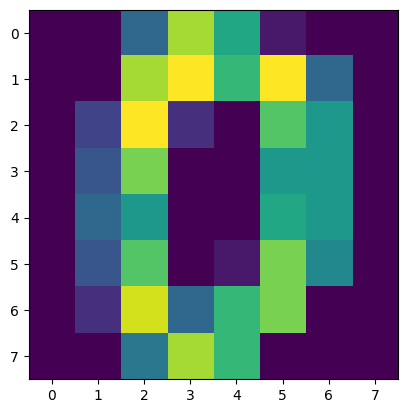

In [6]:
plt.imshow(data.data[0].reshape(8,8))
plt.show()

In [7]:
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

In [8]:
from math import sqrt
from collections import Counter

In [9]:
from collections import Counter

class KNN:
    def __init__(self, n_neighbors=3):
        self.k = n_neighbors
        self.X_train = []
        self.y_train = []

    def fit(self, X, y):
        if len(X) != len(y):
            raise ValueError(
                f"X and y must have the same number of samples, got {len(X)} and {len(y)}"
            )
        self.X_train = X
        self.y_train = y

    def _euclidean_distance(self, a, b):
        return sum((ai - bi) ** 2 for ai, bi in zip(a, b)) ** 0.5

    def pred(self, X):
        predictions = []
        for x in X:
            distances = [
                (self._euclidean_distance(x, x_train), y)
                for x_train, y in zip(self.X_train, self.y_train)
            ]
            k_nearest = sorted(distances, key=lambda d: d[0])[:self.k]
            labels = [label for _, label in k_nearest]
            most_common = Counter(labels).most_common(1)[0][0]
            predictions.append(most_common)
        return predictions

    def score(self, X, y):
        y_pred = self.pred(X)
        correct = sum(1 for yp, yt in zip(y_pred, y) if yp == yt)
        return correct / len(y)

In [10]:
model = KNN()
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
print(acc)

0.9861111111111112


In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
k_model = KNeighborsClassifier(n_neighbors=3)
k_model.fit(X_train, y_train)
acc = k_model.score(X_test, y_test)
print(acc)

0.9861111111111112
